**Dataset Link:**https://drive.google.com/file/d/1n5sNB5DVsTGSFlD5AVMcTzNlPf_CeiyT/view?usp=drive_link

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/insurance_data.csv')
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


# **EDA**

**Get basic info about this dataset. Check for null values, duplicates values. Find out how many people in the dataset are smoker and non-smoker**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [ ]:
df.isnull().sum()    # We will get null values with respect to every column.

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


In [ ]:
df.isnull().sum().sum()   #Entire null values in our dataframe.

np.int64(52)

In [ ]:
df.duplicated().sum()   #Checking duplicate data.

np.int64(0)

In [ ]:
df['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


In [ ]:
# 1338 -> 52 null values???

In [ ]:
# Let's replace null values

# Numerical column: Mean
# Categorical column: Mode

In [ ]:
# Approach: We need to go through each and every column of our dataset
# Then we need to check the datatype of every column that we will be going through
# If the datatype of column==numerical(int, float) we will replace with mean
# If the datatype of column==categorical we will replace with mode.

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [ ]:
for x in df.columns:
    if df[x].dtype=='object':    # When the column is of object datatype.
        df[x].fillna(df[x].mode()[0],inplace=True)
    else:                                 #The column is not of object datatype it clearly means it's numerical
        df[x].fillna(df[x].mean(),inplace=True)


<ipython-input-12-2bb3903302db>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[x].fillna(df[x].mean(),inplace=True)
<ipython-input-12-2bb3903302db>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.met

In [ ]:
df['region'].mode()   # This returns the output in a Series.

,region
0,southeast


In [ ]:
df['region'].mode()[0]

'southeast'

In [ ]:
pd.Series([10])

,0
0,10


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
Claim_Amount,0
past_consultations,0
num_of_steps,0
Hospital_expenditure,0
NUmber_of_past_hospitalizations,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1338 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1338 non-null   float64
 3   children                         1338 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1338 non-null   float64
 6   past_consultations               1338 non-null   float64
 7   num_of_steps                     1338 non-null   float64
 8   Hospital_expenditure             1338 non-null   float64
 9   NUmber_of_past_hospitalizations  1338 non-null   float64
 10  Anual_Salary                     1338 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

**Outliers Detection**

In [ ]:
# # Select numeric columns
# numeric_cols = df.select_dtypes(include='number')
# # Dictionary to store counts
# outlier_counts = {}
# for col in numeric_cols.columns:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Count outliers
#     outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
#     outlier_counts[col] = len(outliers)
# # Print counts
# for col, count in outlier_counts.items():
#     print(f"{col}: {count} outliers")

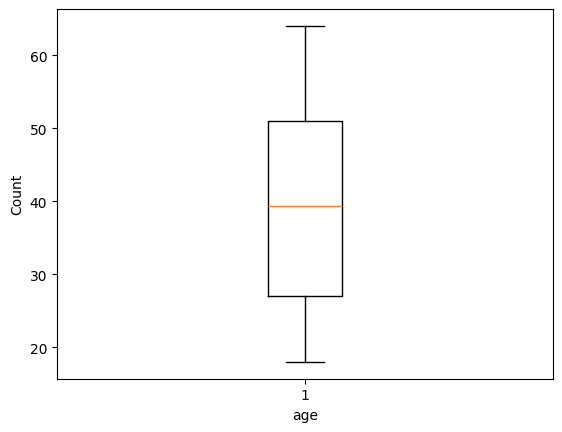

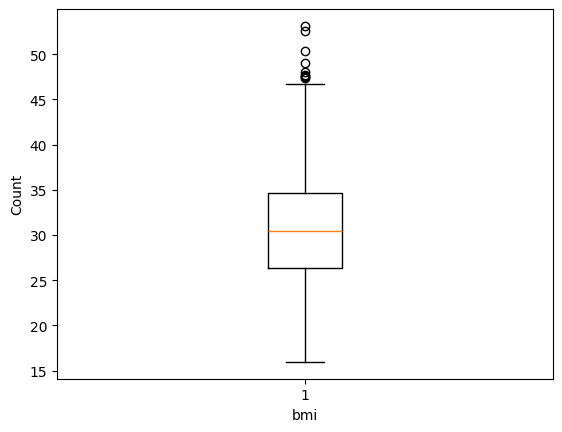

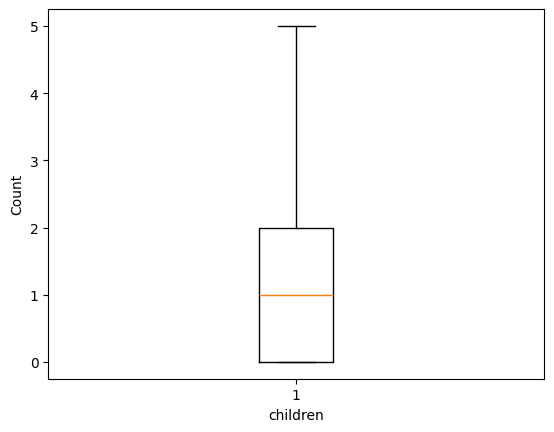

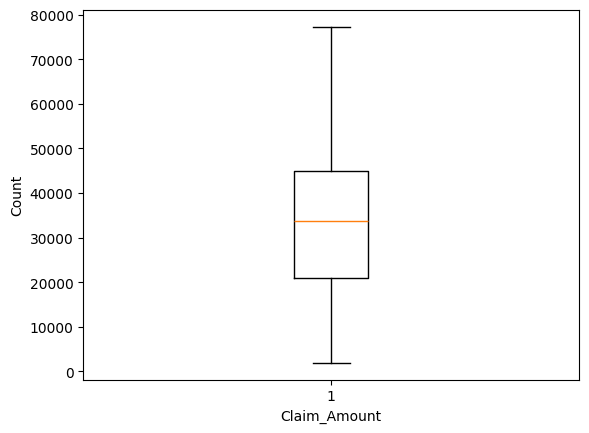

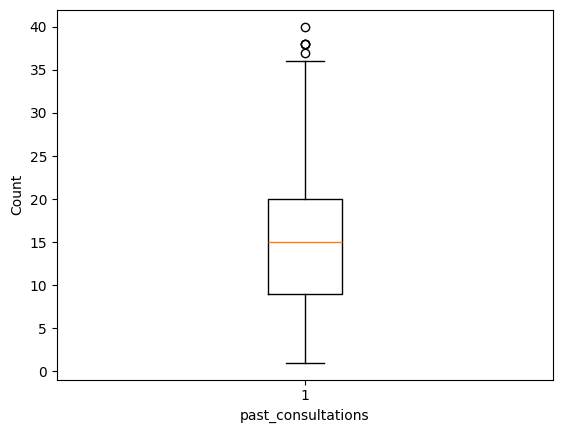

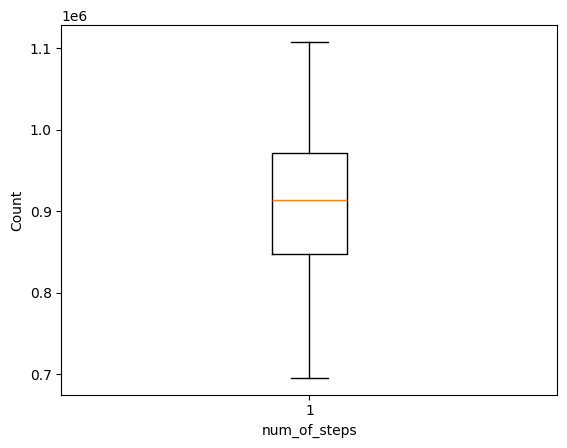

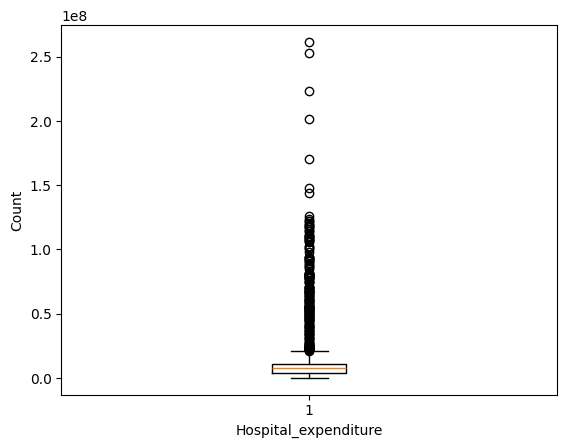

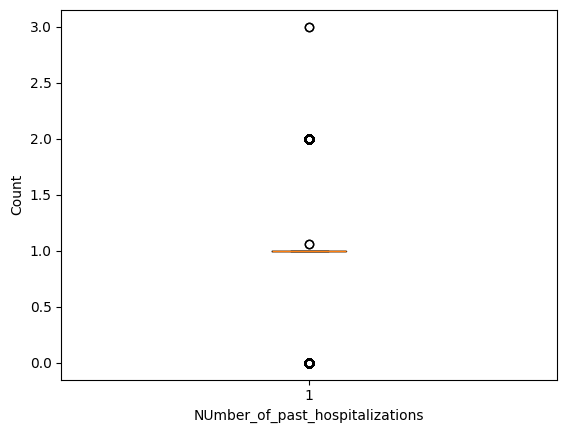

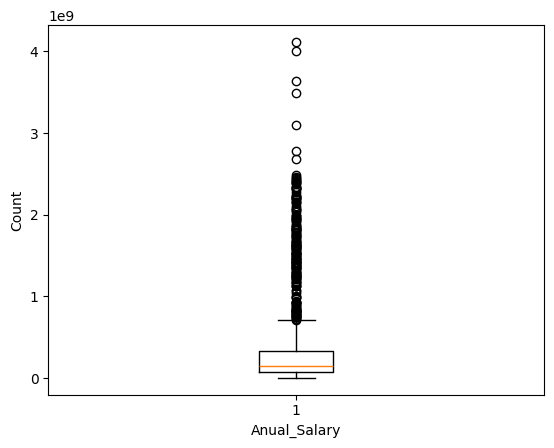

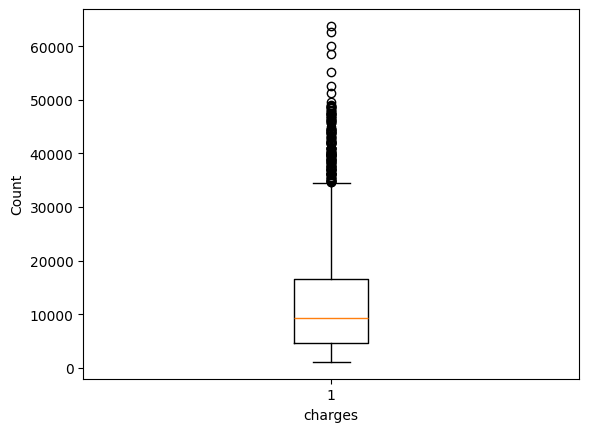

In [ ]:
for x in df.columns:
    if df[x].dtype!='object':  # Filtering categorical columns.
        plt.boxplot(df[x])
        plt.xlabel(x)
        plt.ylabel('Count')
        plt.show()

In [ ]:
# Q1 = df['bmi'].quantile(0.25)
# Q3 = df['bmi'].quantile(0.75)

# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5*IQR
# upper_bound = Q3 + 1.5*IQR

# df = df[(df['bmi']>=lower_bound) & (df['bmi']<=upper_bound)]

In [ ]:
# print(Q3)
# print(upper_bound)

In [ ]:
# plt.boxplot(df['bmi'])
# plt.title('BMI')
# plt.show()

In [ ]:
# Homework: Remove outliers from rest of the columns.
# While removing for rest of the columns, skip categorical columns with "charges" column.


In [ ]:
for x in df.columns:
    if df[x].dtype=='object' or x=='charges':
        continue

    Q1 =  df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3-Q1
    lower_fence = Q1 - 1.5*IQR
    upper_fence = Q3 + 1.5* IQR
    df = df[(df[x]>=lower_fence) & (df[x]<=upper_fence)]


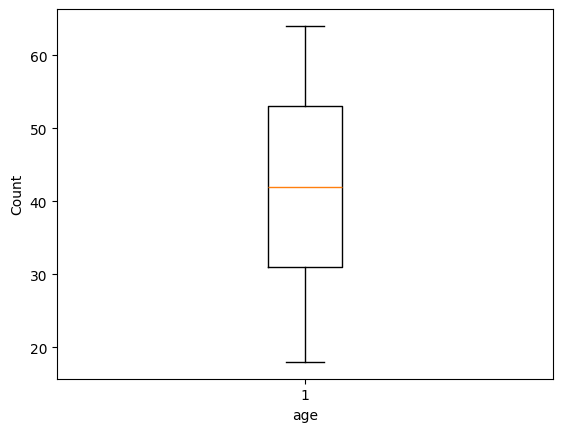

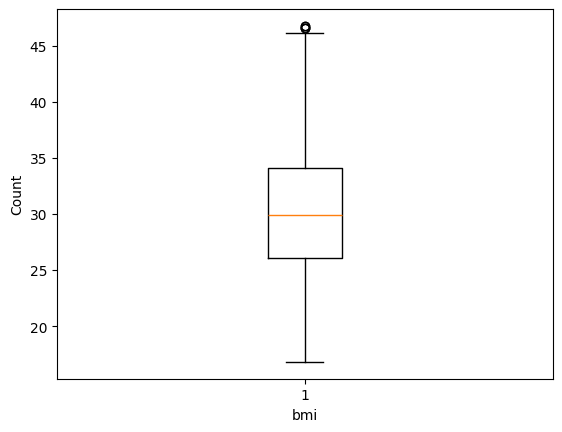

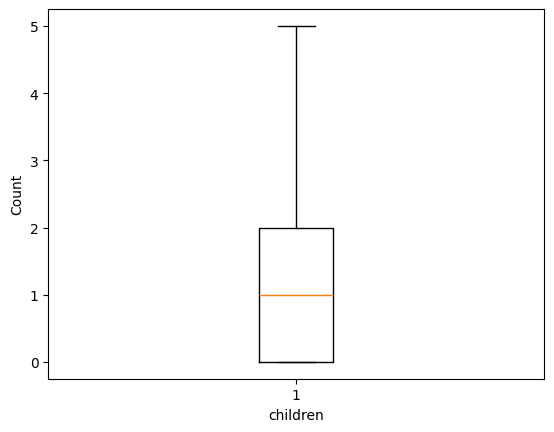

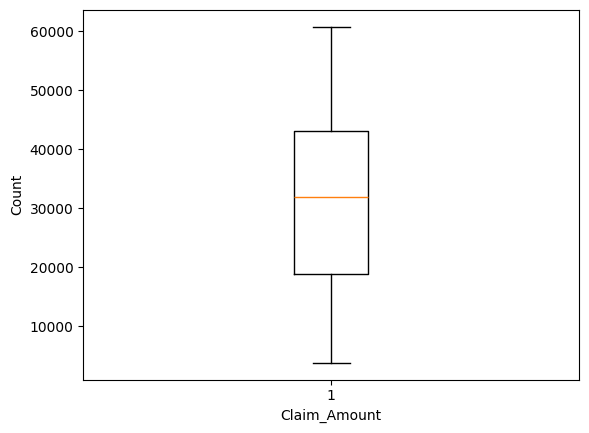

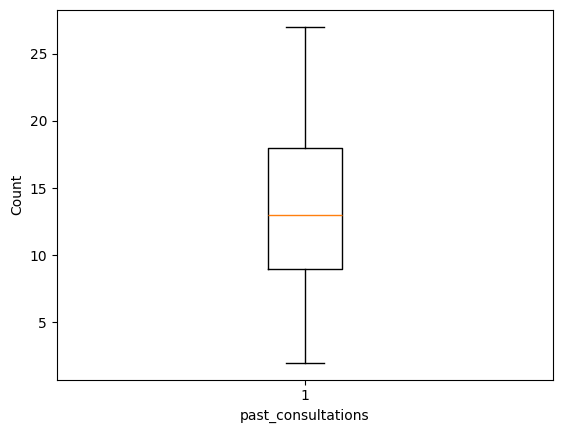

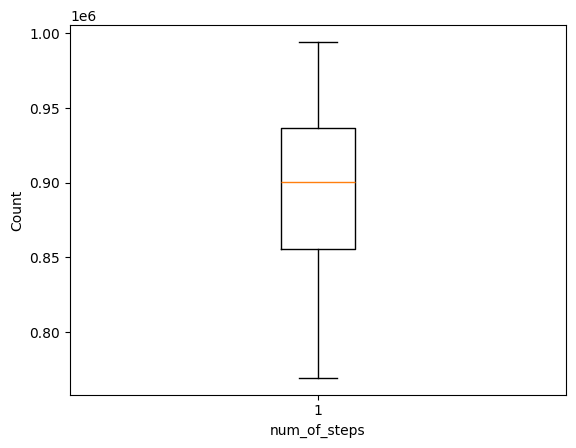

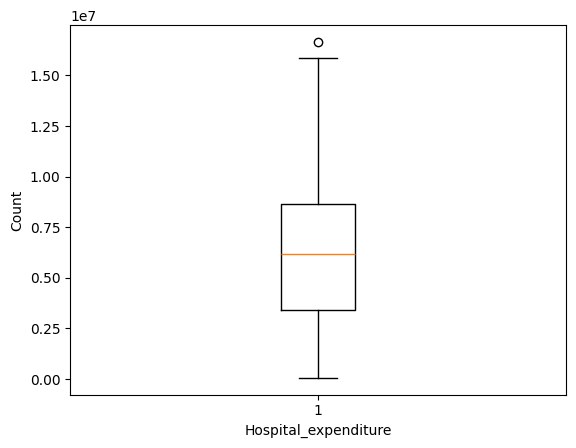

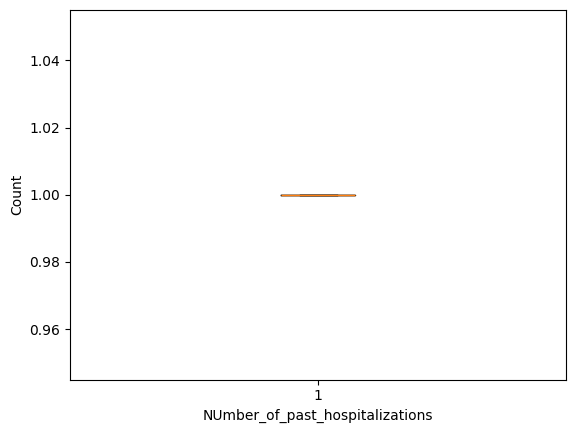

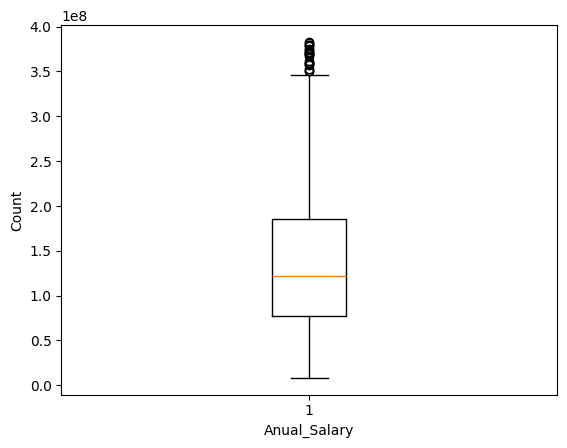

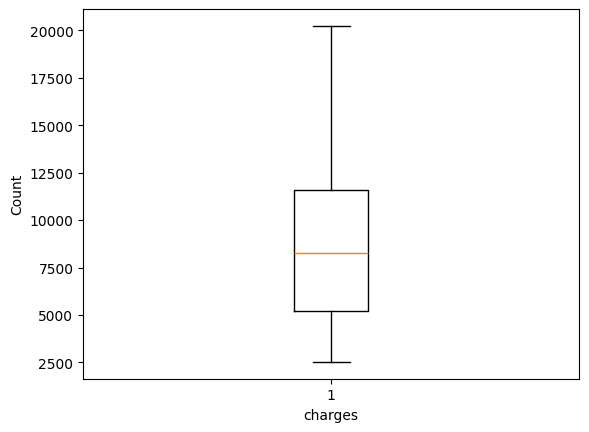

In [ ]:
for x in df.columns:
    if df[x].dtype!='object':
        plt.boxplot(df[x])
        plt.xlabel(x)
        plt.ylabel('Count')
        plt.show()

In [ ]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
151,25.0,male,27.550,0.0,no,39148.95495,10.0,780652.0,8.614147e+06,1.0,5.452601e+07,northwest,2523.16950
152,22.0,female,20.235,0.0,no,41547.52536,13.0,802627.0,2.491594e+05,1.0,1.671847e+07,northwest,2527.81865
153,25.0,male,35.625,0.0,no,39660.60193,12.0,770773.0,3.043323e+06,1.0,4.852694e+07,northwest,2534.39375
154,20.0,male,31.130,2.0,no,16032.87148,7.0,769255.0,1.599069e+06,1.0,2.441262e+07,southeast,2566.47070
155,21.0,female,17.400,1.0,no,31090.98977,21.0,778769.0,3.015365e+06,1.0,5.853579e+07,southwest,2585.26900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,29.0,female,27.940,1.0,yes,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,southeast,19107.77960
1048,31.0,male,25.900,3.0,yes,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,southwest,19199.94400
1050,31.0,male,29.810,0.0,yes,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08,southeast,19350.36890
1062,43.0,female,20.045,2.0,yes,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08,northeast,19798.05455


# **Feature Selection**

In [ ]:
# NewTask: Check for multicolinearity

# VIF -> Variance Inflation Factor
# VIF helps us detect multicolinearity among all the columns.
# If your VIF >=6, it means that column is not important for us as it's having high multicolinearity. We will remove this remove.


In [ ]:
col_list = []
for x in df.columns:
    if df[x].dtype!='object' and x!='charges':
        col_list.append(x)

In [ ]:
col_list    #All Indepdendent numerical columns.

['age',
 'bmi',
 'children',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary']

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
dummy = df[col_list]
dummy

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary
151,25.0,27.550,0.0,39148.95495,10.0,780652.0,8.614147e+06,1.0,5.452601e+07
152,22.0,20.235,0.0,41547.52536,13.0,802627.0,2.491594e+05,1.0,1.671847e+07
153,25.0,35.625,0.0,39660.60193,12.0,770773.0,3.043323e+06,1.0,4.852694e+07
154,20.0,31.130,2.0,16032.87148,7.0,769255.0,1.599069e+06,1.0,2.441262e+07
155,21.0,17.400,1.0,31090.98977,21.0,778769.0,3.015365e+06,1.0,5.853579e+07
...,...,...,...,...,...,...,...,...,...
1046,29.0,27.940,1.0,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08
1048,31.0,25.900,3.0,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08
1050,31.0,29.810,0.0,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08
1062,43.0,20.045,2.0,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08


In [ ]:
vif_data = pd.DataFrame()
vif_data['Feature'] = dummy.columns  #In this feature column we are storing all the independent numerical column of our actual datagframe.
vif_data
vif_list = []
for i in range(len(dummy.columns)):
    vif = variance_inflation_factor(dummy.values,i)   # i will be the column index.
    vif_list.append(vif)
vif_data['VIF'] = vif_list

In [ ]:
vif_data

,Feature,VIF
0,age,2.196194
1,bmi,1.052717
2,children,1.076523
3,Claim_Amount,1.035033
4,past_consultations,1.073989
5,num_of_steps,5.882074
6,Hospital_expenditure,1.173208
7,NUmber_of_past_hospitalizations,1393.169724
8,Anual_Salary,3.983678


In [ ]:
# NUmber_of_past_hospitalizations is having highest VIF, now we will remove this column.

df = df.drop(['NUmber_of_past_hospitalizations'],axis=1)

In [ ]:
col_list = []
for x in df.columns:
    if df[x].dtype!='object' and x!='charges':
        col_list.append(x)

dummy = df[col_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = col_list
vif_data
vif_list = []
for i in range(len(dummy.columns)):
    vif = variance_inflation_factor(dummy.values,i)   # i will be the column index.
    vif_list.append(vif)
vif_data['VIF'] = vif_list

In [ ]:
vif_data

,Feature,VIF
0,age,16.357708
1,bmi,26.868143
2,children,2.069345
3,Claim_Amount,5.864753
4,past_consultations,6.463488
5,num_of_steps,58.376344
6,Hospital_expenditure,5.423018
7,Anual_Salary,6.000703


In [ ]:
df = df.drop(columns=['num_of_steps'])

In [ ]:
col_list = []
for x in df.columns:
    if df[x].dtype!='object' and x!='charges':
        col_list.append(x)

dummy = df[col_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = col_list
vif_data
vif_list = []
for i in range(len(dummy.columns)):
    vif = variance_inflation_factor(dummy.values,i)   # i will be the column index.
    vif_list.append(vif)
vif_data['VIF'] = vif_list
vif_data

,Feature,VIF
0,age,13.550906
1,bmi,14.522848
2,children,1.954239
3,Claim_Amount,5.319321
4,past_consultations,5.957746
5,Hospital_expenditure,5.142291
6,Anual_Salary,5.783595


In [ ]:
df = df.drop(columns=['bmi'])

In [ ]:
col_list = []
for x in df.columns:
    if df[x].dtype!='object' and x!='charges':
        col_list.append(x)

dummy = df[col_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = col_list
vif_data
vif_list = []
for i in range(len(dummy.columns)):
    vif = variance_inflation_factor(dummy.values,i)   # i will be the column index.
    vif_list.append(vif)
vif_data['VIF'] = vif_list
vif_data

,Feature,VIF
0,age,8.803866
1,children,1.835999
2,Claim_Amount,4.912972
3,past_consultations,5.613220
4,Hospital_expenditure,4.840950
5,Anual_Salary,5.636699


In [ ]:
df = df.drop(columns=['age'])

In [ ]:
col_list = []
for x in df.columns:
    if df[x].dtype!='object' and x!='charges':
        col_list.append(x)

dummy = df[col_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = col_list
vif_data
vif_list = []
for i in range(len(dummy.columns)):
    vif = variance_inflation_factor(dummy.values,i)   # i will be the column index.
    vif_list.append(vif)
vif_data['VIF'] = vif_list
vif_data

,Feature,VIF
0,children,1.827298
1,Claim_Amount,4.290828
2,past_consultations,4.942338
3,Hospital_expenditure,4.624025
4,Anual_Salary,4.922027


In [ ]:
df

,sex,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary,region,charges
151,male,0.0,no,39148.95495,10.0,8.614147e+06,5.452601e+07,northwest,2523.16950
152,female,0.0,no,41547.52536,13.0,2.491594e+05,1.671847e+07,northwest,2527.81865
153,male,0.0,no,39660.60193,12.0,3.043323e+06,4.852694e+07,northwest,2534.39375
154,male,2.0,no,16032.87148,7.0,1.599069e+06,2.441262e+07,southeast,2566.47070
155,female,1.0,no,31090.98977,21.0,3.015365e+06,5.853579e+07,southwest,2585.26900
...,...,...,...,...,...,...,...,...,...
1046,female,1.0,yes,51168.25474,23.0,1.665982e+07,3.712188e+08,southeast,19107.77960
1048,male,3.0,yes,46619.40230,27.0,1.361938e+07,3.812895e+08,southwest,19199.94400
1050,male,0.0,yes,24382.58056,21.0,1.028991e+07,3.745310e+08,southeast,19350.36890
1062,female,2.0,yes,21596.43846,10.0,1.083030e+07,3.696849e+08,northeast,19798.05455


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for x in df.columns:
    if df[x].dtype=='object':
        df[x] = le.fit_transform(df[x])

In [ ]:
df

,sex,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary,region,charges
151,1,0.0,0,39148.95495,10.0,8.614147e+06,5.452601e+07,1,2523.16950
152,0,0.0,0,41547.52536,13.0,2.491594e+05,1.671847e+07,1,2527.81865
153,1,0.0,0,39660.60193,12.0,3.043323e+06,4.852694e+07,1,2534.39375
154,1,2.0,0,16032.87148,7.0,1.599069e+06,2.441262e+07,2,2566.47070
155,0,1.0,0,31090.98977,21.0,3.015365e+06,5.853579e+07,3,2585.26900
...,...,...,...,...,...,...,...,...,...
1046,0,1.0,1,51168.25474,23.0,1.665982e+07,3.712188e+08,2,19107.77960
1048,1,3.0,1,46619.40230,27.0,1.361938e+07,3.812895e+08,3,19199.94400
1050,1,0.0,1,24382.58056,21.0,1.028991e+07,3.745310e+08,2,19350.36890
1062,0,2.0,1,21596.43846,10.0,1.083030e+07,3.696849e+08,0,19798.05455


# **Model Building:**

In [ ]:
X = df.iloc[:,:8]  #Independent Variables
y = df.iloc[:,-1]  #Dependent Variables

In [ ]:
X

,sex,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary,region
151,1,0.0,0,39148.95495,10.0,8.614147e+06,5.452601e+07,1
152,0,0.0,0,41547.52536,13.0,2.491594e+05,1.671847e+07,1
153,1,0.0,0,39660.60193,12.0,3.043323e+06,4.852694e+07,1
154,1,2.0,0,16032.87148,7.0,1.599069e+06,2.441262e+07,2
155,0,1.0,0,31090.98977,21.0,3.015365e+06,5.853579e+07,3
...,...,...,...,...,...,...,...,...
1046,0,1.0,1,51168.25474,23.0,1.665982e+07,3.712188e+08,2
1048,1,3.0,1,46619.40230,27.0,1.361938e+07,3.812895e+08,3
1050,1,0.0,1,24382.58056,21.0,1.028991e+07,3.745310e+08,2
1062,0,2.0,1,21596.43846,10.0,1.083030e+07,3.696849e+08,0


In [ ]:
y

,charges
151,2523.16950
152,2527.81865
153,2534.39375
154,2566.47070
155,2585.26900
...,...
1046,19107.77960
1048,19199.94400
1050,19350.36890
1062,19798.05455


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size = 0.8,random_state=7)
x_train

,sex,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary,region
217,0,0.0,0,6130.345486,15.0,2.046063e+06,6.508980e+07,3
777,0,0.0,0,48856.609420,9.0,7.834785e+06,1.252456e+08,1
160,1,1.0,0,27356.102420,4.0,2.158890e+06,9.739940e+07,1
1007,1,0.0,1,25808.795930,21.0,7.445284e+06,2.944865e+08,2
516,1,2.0,0,51466.023220,16.0,3.901163e+05,6.759640e+07,2
...,...,...,...,...,...,...,...,...
733,0,3.0,0,33361.327180,14.0,6.087441e+06,1.809741e+08,2
654,1,0.0,0,42322.350080,16.0,3.888710e+06,1.012005e+08,1
690,0,3.0,0,21457.303480,10.0,5.296198e+06,1.224163e+08,0
347,1,4.0,0,43279.048460,9.0,2.977256e+06,1.100850e+08,1


In [ ]:
y_train.shape

(704,)

In [ ]:
x_test.shape

(177, 8)

In [ ]:
y_test.shape

(177,)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)   #

In [ ]:
y_pred

array([ 5719.63163937,  8999.79622555,  8905.44570268,  7565.70106779,
       18667.38420813, 15104.05862658,  8187.55350691,  5464.34528026,
        7984.65470797,  4828.94707611, 11741.68956832,  5965.17970245,
        4787.43970567, 17617.1950153 ,  7228.25099913,  9913.60505079,
       12340.75901549, 15501.88787997,  7020.90384824,  5482.60264909,
       12442.39953136,  5444.93765054, 15682.19231586,  5788.96144747,
       10329.36949435,  6896.66143708,  8923.90386503,  4474.14912656,
       13184.00952941,  6138.84727996,  3348.2942117 ,  8546.06033809,
       16644.6327483 ,  7008.97431675,  2864.53466557,  7819.25788974,
       11794.35557882,  9582.77896032,  8257.85854267, 12064.1416739 ,
       18613.69356072,  5060.59594842, 12500.64872383,  6743.21232873,
        6015.28887067,  5519.79380567, 16755.56311875,  9269.00533432,
        9259.31380883,  4878.0358731 ,  8653.17764501, 15476.82666225,
        4573.52240732,  7886.35392991, 13545.49553767,  8562.97854189,
      

In [ ]:
error = pd.DataFrame(columns=['Actual Values','Predicted Values'])

In [ ]:
error

,Actual Values,Predicted Values


In [ ]:
error['Actual Values'] = y_test
error['Predicted Values'] = y_pred
error

,Actual Values,Predicted Values
197,3077.09550,5719.631639
662,9283.56200,8999.796226
619,8601.32930,8905.445703
298,4399.73100,7565.701068
1026,18157.87600,18667.384208
...,...,...
598,8347.16430,7838.201186
232,3537.70300,5710.002312
726,10231.49990,7126.094785
757,10796.35025,11159.880189


In [ ]:
error['Error Rate'] = error['Actual Values'] -error['Predicted Values']

In [ ]:
error

,Actual Values,Predicted Values,Error Rate
197,3077.09550,5719.631639,-2642.536139
662,9283.56200,8999.796226,283.765774
619,8601.32930,8905.445703,-304.116403
298,4399.73100,7565.701068,-3165.970068
1026,18157.87600,18667.384208,-509.508208
...,...,...,...
598,8347.16430,7838.201186,508.963114
232,3537.70300,5710.002312,-2172.299312
726,10231.49990,7126.094785,3105.405115
757,10796.35025,11159.880189,-363.529939


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse = mean_squared_error(y_test,y_pred)  #mean squared error
print(mse)

2674836.1369436677


In [ ]:
rmse = np.sqrt(mse)     # root mean squared error.
rmse

np.float64(1635.4926282144067)

In [ ]:
r2_accuracy = r2_score(y_test,y_pred)
r2_accuracy*100

85.96118266582677

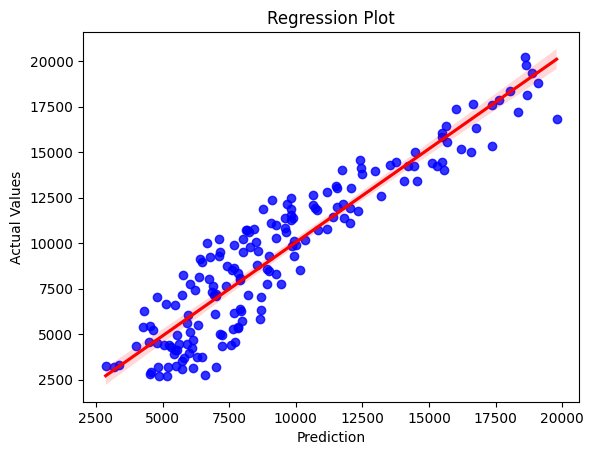

In [ ]:
# Let's build a regression plot

sns.regplot(x=y_pred,y=y_test,line_kws={'color':'red'},color='blue')
plt.xlabel('Prediction')
plt.ylabel('Actual Values')
plt.title('Regression Plot')
plt.show()

<Axes: >

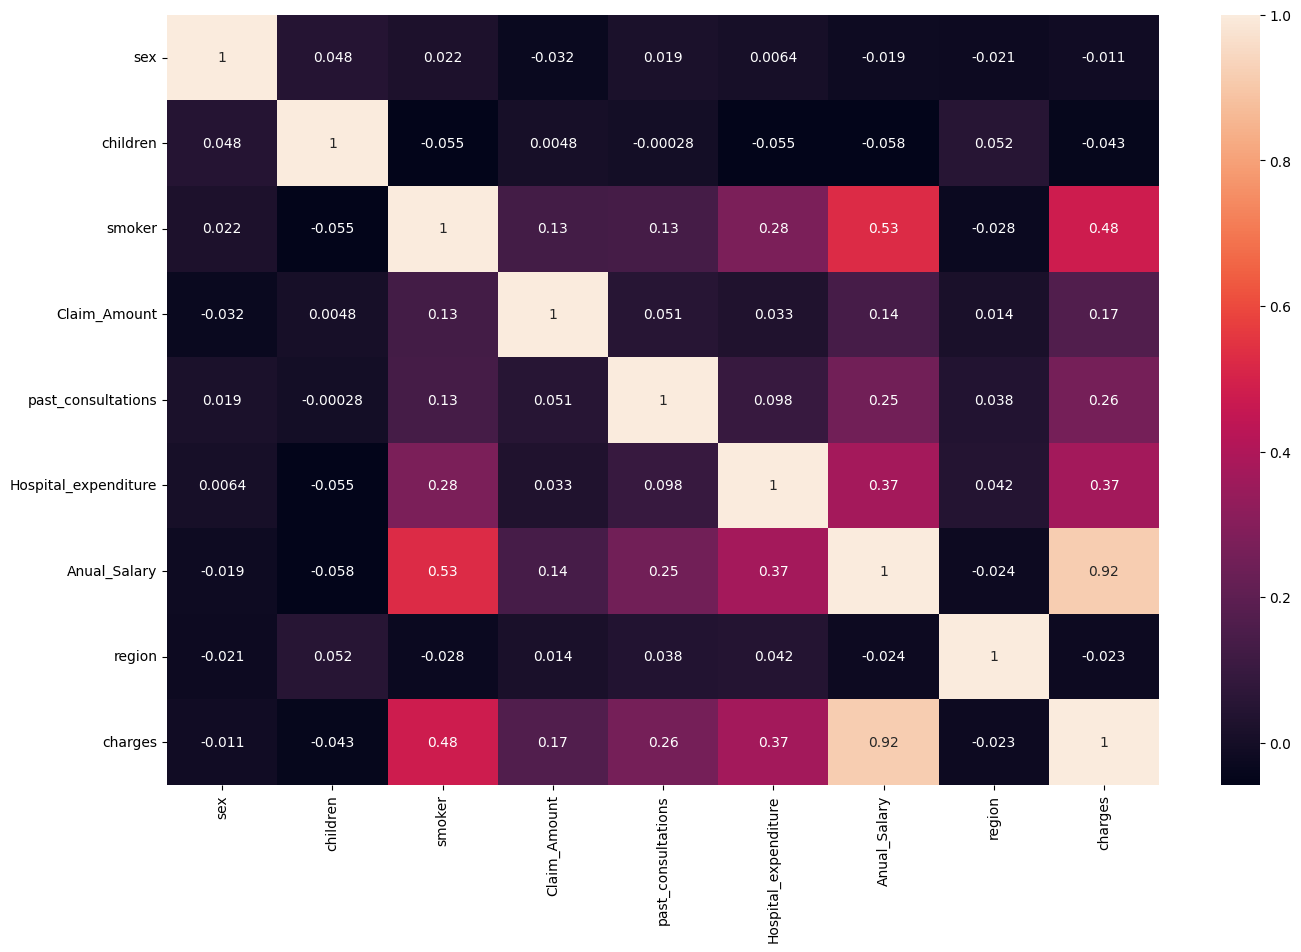

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)

In [ ]:
X

,sex,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary,region
151,1,0.0,0,39148.95495,10.0,8.614147e+06,5.452601e+07,1
152,0,0.0,0,41547.52536,13.0,2.491594e+05,1.671847e+07,1
153,1,0.0,0,39660.60193,12.0,3.043323e+06,4.852694e+07,1
154,1,2.0,0,16032.87148,7.0,1.599069e+06,2.441262e+07,2
155,0,1.0,0,31090.98977,21.0,3.015365e+06,5.853579e+07,3
...,...,...,...,...,...,...,...,...
1046,0,1.0,1,51168.25474,23.0,1.665982e+07,3.712188e+08,2
1048,1,3.0,1,46619.40230,27.0,1.361938e+07,3.812895e+08,3
1050,1,0.0,1,24382.58056,21.0,1.028991e+07,3.745310e+08,2
1062,0,2.0,1,21596.43846,10.0,1.083030e+07,3.696849e+08,0


In [ ]:
sex	= 1
children = 0
smoker = 1
Claim_Amount = 25000
past_consultations = 8
Hospital_expenditure = 850000
Anual_Salary = 5.452601e+07
region = 2


In [ ]:
new_pred = model.predict([[sex,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary,region]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print(new_pred)

[4024.0439071]


In [ ]:
print(model.intercept_)
print(model.coef_)

1594.8844165741166
[-4.29642649e+01  2.95419942e+01 -3.71591770e+02  1.46418624e-02
  2.06764924e+01  3.96170157e-05  4.43745071e-05 -7.04911271e+01]


In [ ]:
import statsmodels.api as sm


In [ ]:
X_const = sm.add_constant(x_train)
model_beta = sm.OLS(y_train,X_const).fit()

In [ ]:
print(model_beta.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     442.0
Date:                Tue, 03 Jun 2025   Prob (F-statistic):          1.03e-266
Time:                        03:30:47   Log-Likelihood:                -6179.9
No. Observations:                 704   AIC:                         1.238e+04
Df Residuals:                     695   BIC:                         1.242e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1594.8844 